## Ejercicio 1
Escribir un algoritmo PSO para la maximización de la función:
$$
    y=sin(x)+sin(x^2)
$$
en el intervalo de $0 ≤ x ≤ 10$. Ejecutar el algoritmo en Python con los siguientes parámetros: 

Número de partículas = 2

Máximo número de iteraciones = 30

Coeficientes de aceleración c1 = c2 = 1.49

Peso de inercia w = 0.5


In [63]:
import numpy as np
# from tests.optimizers.test_tolerance import iterations


# función objetivo a maximizar
def f(x):
    return np.sin(x) + np.sin(x**2)  # funcion objetivo: sin(x) + sin(x**2)

# restriccion
def g1(x):
    return 0 <= x <= 10  # restriccion: 0 <= x <= 10

def g2(x):
    return True

# parametros
n_particles = 2  # numero de particulas en el enjambre
max_iterations = 30  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.49  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

# inicialización de particulas
x = np.zeros(n_particles)  # matriz para las posiciones de las particulas
v = np.zeros(n_particles)  # matriz para las velocidades de las particulas
pbest = np.zeros(n_particles)  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = 0  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
gbest_fit_history = [] #va guardando el gbest de cada iteracion

# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

# Optimizacion
for J in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global
        
        # actualizacion de la velocidad de la particula
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()
    gbest_fit_history.append(gbest_fit) 

# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [1.2947]
Valor optimo: 1.956572026914348


a. (Valor 0.1 puntos) Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. (Valor 0.1 puntos) Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. (Valor 0.2 puntos) Graficar usando matplotlib la función objetivo y
agregar un punto celeste en donde el algoritmo haya encontrado el valor
máximo. El gráfico debe contener etiquetas en los ejes, leyenda y un
título.

d. (Valor 0.2 puntos) Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. (Valor 0.4 puntos) Realizar observaciones/comentarios/conclusiones
sobre los resultados obtenidos.

a. La solucion optima encontrada es 1.2945 y el valor optimo es 1.9566

b. 


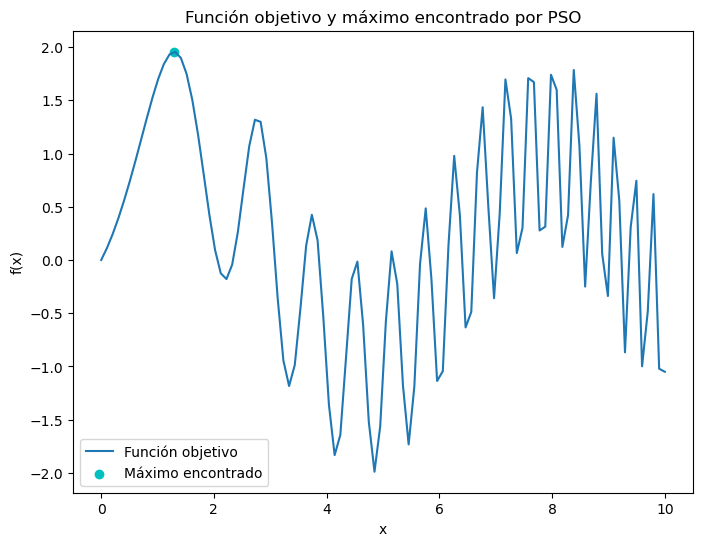

In [64]:
# c.
import matplotlib.pyplot as plt

x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función objetivo')
plt.scatter(gbest, gbest_fit, color='c', label='Máximo encontrado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y máximo encontrado por PSO')
plt.legend()

plt.show()

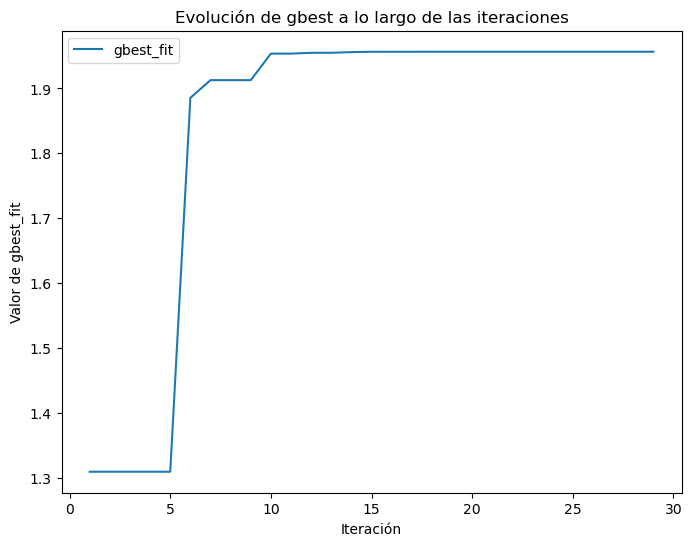

In [65]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_fit_history, label='gbest_fit')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

e. Como se puede ver en el grafico del punto c, el maximo encontrado se aproxima al maximo absoluto de la funcion y. Luego, en el punto d, se puede ver como varia en un principio el valor gbest y luego de la iteracion 15 se estabiliza en el valor 1.29 y ya se queda en ese valor, lo que nos podria estar indicando que encontro el maximo.

## Ejercicio 2
Dada la siguiente función perteneciente a un paraboloide elíptico de la forma:
$$
f(x,y)=(x-a)^2+(y+b)^2
$$
donde, las constantes a y b son valores reales ingresados por el usuario a través de la consola, con intervalos de:
$$
-100<=x<=100, x \in \Re
$$
$$
-100<=y<=100, y \in \Re
$$
$$
-50<=a<=50, a \in \Re
$$
$$
-50<=b<=50, b \in \Re
$$

escribir en Python un algoritmo PSO para la minimización de la función (1) con
los siguientes parámetros: número de partículas = 20, máximo número de
iteraciones = 10, coeficientes de aceleración c1 = c2 = 2, peso de inercia w =
0.7, y que cumpla con las siguientes consignas:

In [66]:
# función objetivo a maximizar
def f(x):
    return (x[0]-20)**2+(x[1]-30)**2  # funcion objetivo: (x-a)^2+(y-b)^2


# primera restriccion
def g1(x):
    return -100 <= x[0] <= 100  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -100 <= x[1] <= 100  # restriccion: -100 <= y <= 100


def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = np.inf  # mejor aptitud global (inicialmente infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit < pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit < pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit < gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    # print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    # print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.7  # Factor de inercia

all_histories2_1 = []
gbest_final_positions2_1 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits2_1 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_1, gbest_fit2_1, gbest_history2_1 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_1.append(gbest_history2_1)
    gbest_final_positions2_1.append(gbest2_1)  # Guardar la mejor posición final
    gbest_final_fits2_1.append(gbest_fit2_1)  # Guardar la mejor aptitud final
    
gbest_mean2_1 = np.mean(gbest_final_positions2_1, axis=0)
gbest_fit_mean2_1 = np.mean(gbest_final_fits2_1)
gbest_history_mean2_1 = np.mean(all_histories2_1, axis=0)

print("Valor gbest =", gbest_mean2_1)
print("Valor optimo =", gbest_fit_mean2_1)


Valor gbest = [20.11610387 30.00408944]
Valor optimo = 2.312164102439017


a. Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. Graficar usando matplotlib la función objetivo f(x, y)
en 3D y agregar un punto rojo en donde el algoritmo haya encontrado el
valor mínimo. El gráfico debe contener etiquetas en los ejes, leyenda y
un título.

d. Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. Establecer el coeficiente de inercia w en 0, ejecutar el
algoritmo y realizar observaciones/comentarios/conclusiones sobre los
resultados observados.

f. Reescribir el algoritmo PSO para que cumpla
nuevamente con los ítems A hasta F pero usando la biblioteca pyswarm
(from pyswarm import pso).

g. Realizar observaciones/comentarios/conclusiones
comparando los resultados obtenidos sin pyswarm y con pyswarm.

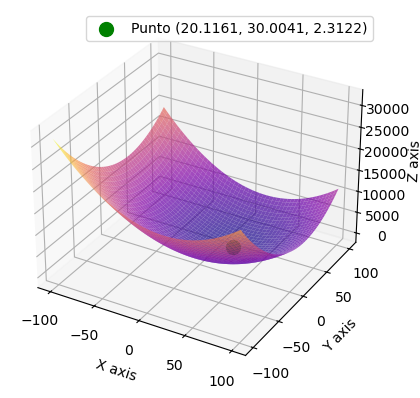

In [67]:
#c. 
# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = (x - 20) ** 2 + (y - 30) ** 2

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)
# Definir un punto
punto_x, punto_y = gbest_mean2_1
punto_z = gbest_fit_mean2_1
# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='green', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

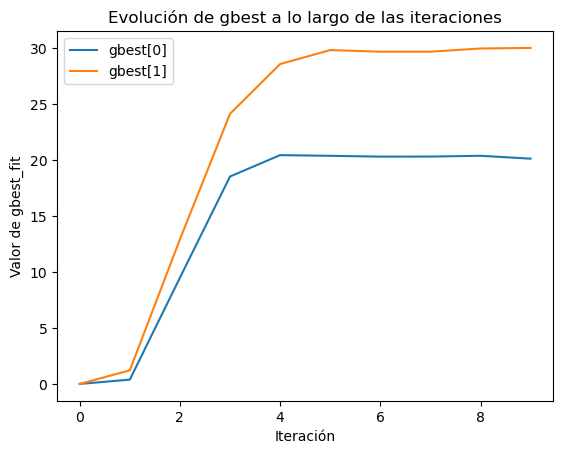

In [68]:
#d.
plt.plot(range(max_iterations), gbest_history_mean2_1[:,0], label='gbest[0]')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,1], label='gbest[1]')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()


In [69]:
#e
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

all_histories2_2 = []
gbest_final_positions2_2 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits2_2 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_2, gbest_fit2_2, gbest_history2_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_2.append(gbest_history2_2)
    gbest_final_positions2_2.append(gbest2_2)  # Guardar la mejor posición final
    gbest_final_fits2_2.append(gbest_fit2_2)  # Guardar la mejor aptitud final
    
gbest_mean2_2 = np.mean(gbest_final_positions2_2, axis=0)
gbest_fit_mean2_2 = np.mean(gbest_final_fits2_2)
gbest_history_mean2_2 = np.mean(all_histories2_2, axis=0)

print("Valor gbest =", gbest_mean2_1)
print("Valor optimo =", gbest_fit_mean2_1)

Valor gbest = [20.11610387 30.00408944]
Valor optimo = 2.312164102439017


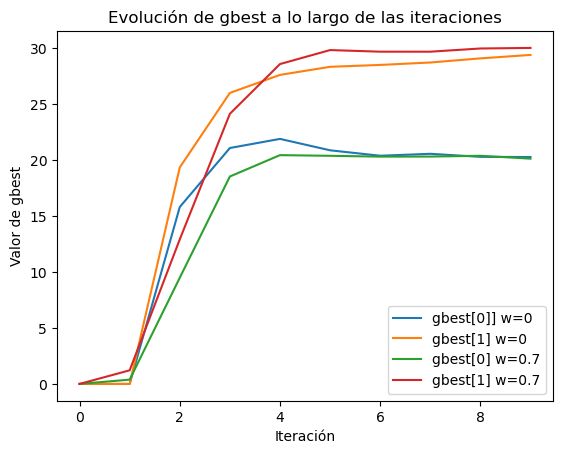

In [70]:
#d.
plt.plot(range(max_iterations), gbest_history_mean2_2[:,0], label='gbest[0]] w=0')
plt.plot(range(max_iterations), gbest_history_mean2_2[:,1], label='gbest[1] w=0')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,0], label='gbest[0] w=0.7')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,1], label='gbest[1] w=0.7')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

In [71]:
#f.
from pyswarm import pso

# Función modificada para registrar el mejor valor global en cada iteración
a = 20  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola
b = 30  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola

# función objetivo
def funcion_objetivo(x):
    return (x[0]-a)**2+(x[1]-b)**2

lb = [-100, -100]  # limite inf
ub = [100, 100]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
historial_gbest = []

# Llamada a la función pso
solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=0.7)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
New best for swarm at iteration 1: [-18.02851015  33.99432848] 1462.1222440474635
Best after iteration 1: [-18.02851015  33.99432848] 1462.1222440474635
Best after iteration 2: [-18.02851015  33.99432848] 1462.1222440474635
Best after iteration 3: [-18.02851015  33.99432848] 1462.1222440474635
New best for swarm at iteration 4: [-6.47958465 45.29827779] 935.2057066693617
New best for swarm at iteration 4: [-0.61968025 19.05838509] 544.890150434491
New best for swarm at iteration 4: [13.34588131 36.86972536] 91.47042203292028
Best after iteration 4: [13.34588131 36.86972536] 91.47042203292028
Best after iteration 5: [13.34588131 36.86972536] 91.47042203292028
New best for swarm at iteration 6: [14.76115396 23.10487732] 74.98822456552514
Best after iteration 6: [14.76115396 23.10487732] 74.98822456552514
Best after iteration 7: [14.76115396 23.10487732] 74.98822456552514
New best for swarm at iteration 8: [24.00747172 32.81297728] 23.972670724400043
Best after itera

## Ejercicio 3

Maximizar mediante PSO en Python y con parámetros a elección la función:
$$
z=e^{-0.1\cdot (x^2+y^2)}\cdot cos(x)\cdot sin(x)
$$
donde el intervalo de las variables de decisión se encuentra en el rango 
$$
-50 <= (x, y) <= 50. 
$$

In [72]:
#e.
# función objetivo a maximizar
def f(x):
    return np.exp(-0.1*(x[0]**2+x[1]**2))*np.cos(x[0])*np.sin(x[0])


# primera restriccion


def g1(x):
    return -50 <= x[0] <= 50  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -50 <= x[1] <= 50  # restriccion: -100 <= y <= 100

def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente-infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.8  # Factor de inercia

all_histories3_1 = []
gbest_final_positions3_1 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_1 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest3_1, gbest_fit3_1, gbest_history3_1 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories3_1.append(gbest_history3_1)
    gbest_final_positions3_1.append(gbest3_1)  # Guardar la mejor posición final
    gbest_final_fits3_1.append(gbest_fit3_1)  # Guardar la mejor aptitud final
    
gbest_mean3_1 = np.mean(gbest_final_positions3_1, axis=0)
gbest_fit_mean3_1 = np.mean(gbest_final_fits3_1)
gbest_history_mean3_1 = np.mean(all_histories3_1, axis=0)

Mejor solucion: [0.8125, -0.2718]
Valor optimo: 0.46393024361215884
Mejor solucion: [0.8148, 0.0258]
Valor optimo: 0.4670479619862439
Mejor solucion: [0.7879, 0.2407]
Valor optimo: 0.4671861946318465
Mejor solucion: [0.7517, -0.0869]
Valor optimo: 0.4711022232582575
Mejor solucion: [0.6602, 0.6123]
Valor optimo: 0.4466891636671495
Mejor solucion: [0.6834, 0.3963]
Valor optimo: 0.46001502641062003
Mejor solucion: [0.7761, -0.2628]
Valor optimo: 0.4674504498059711
Mejor solucion: [0.7363, 0.1760]
Valor optimo: 0.4698756482447033
Mejor solucion: [0.8445, 0.1729]
Valor optimo: 0.46095200727211677
Mejor solucion: [0.7556, 0.1523]
Valor optimo: 0.4703214763048581
Mejor solucion: [0.7805, 0.0337]
Valor optimo: 0.47037243882556146
Mejor solucion: [0.7250, 0.1244]
Valor optimo: 0.470212501650444
Mejor solucion: [0.7338, -0.0846]
Valor optimo: 0.4709303063134099
Mejor solucion: [0.6744, -0.1271]
Valor optimo: 0.46528750194048
Mejor solucion: [0.7656, 0.4357]
Valor optimo: 0.46230534386684324
Mej

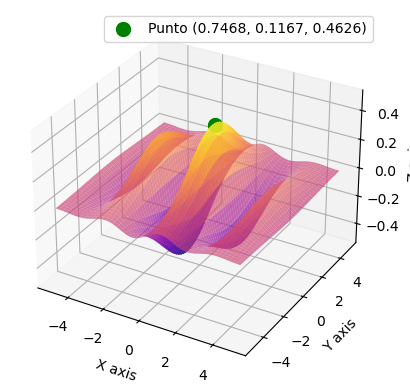

In [79]:
#c. 
import numpy as np
import matplotlib.pyplot as plt



# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = np.exp(-0.1*(x**2+y**2))*np.cos(x)*np.sin(x)

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)
# Definir un punto
punto_x, punto_y = gbest_mean3_1
punto_z = gbest_fit_mean3_1
# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='green', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

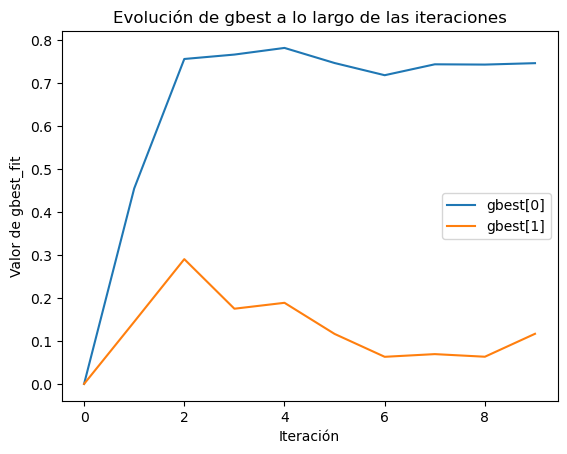

In [74]:
# #d.

plt.plot(range(max_iterations), gbest_history_mean3_1[:,0], label='gbest[0]')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,1], label='gbest[1]')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()


In [75]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

all_histories3_2 = []
gbest_final_positions3_2 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_2 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest3_2, gbest_fit3_2, gbest_history3_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories3_2.append(gbest_history3_2)
    gbest_final_positions3_2.append(gbest3_2)  # Guardar la mejor posición final
    gbest_final_fits3_2.append(gbest_fit3_2)  # Guardar la mejor aptitud final
    
gbest_mean3_2 = np.mean(gbest_final_positions3_2, axis=0)
gbest_fit_mean3_2 = np.mean(gbest_final_fits3_2)
gbest_history_mean3_2 = np.mean(all_histories3_2, axis=0)

Mejor solucion: [0.7419, 0.0995]
Valor optimo: 0.4709672660874929
Mejor solucion: [0.8074, 0.0425]
Valor optimo: 0.4679068694802496
Mejor solucion: [0.7670, 0.0850]
Valor optimo: 0.47077403009572744
Mejor solucion: [0.7573, 0.0975]
Valor optimo: 0.4709384264209835
Mejor solucion: [0.7470, 0.0722]
Valor optimo: 0.4712244710677952
Mejor solucion: [0.7309, 0.0695]
Valor optimo: 0.47095136614242955
Mejor solucion: [0.7472, 0.0020]
Valor optimo: 0.47147021538522293
Mejor solucion: [0.7623, 0.0062]
Valor optimo: 0.4712690735544712
Mejor solucion: [0.7407, 0.1105]
Valor optimo: 0.47084172444644323
Mejor solucion: [0.7503, 0.0089]
Valor optimo: 0.471462538570735
Mejor solucion: [0.7397, 0.3900]
Valor optimo: 0.4642874948766562
Mejor solucion: [0.7493, 0.0292]
Valor optimo: 0.47142958239446076
Mejor solucion: [0.7150, 0.5305]
Valor optimo: 0.4573295112281434
Mejor solucion: [0.7457, 0.0499]
Valor optimo: 0.4713481207021956
Mejor solucion: [0.7279, 0.0838]
Valor optimo: 0.47073647394631707
Mejor

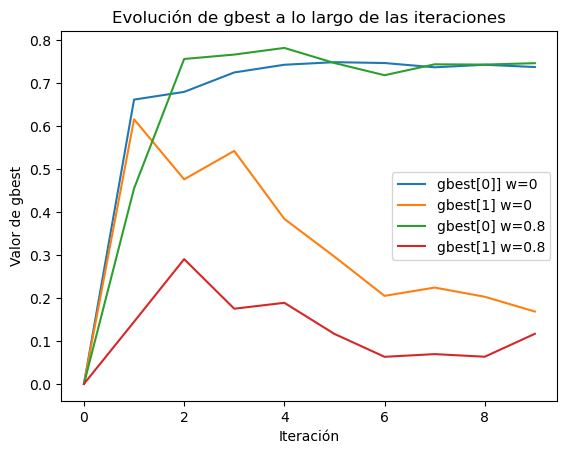

In [76]:
plt.plot(range(max_iterations), gbest_history_mean3_2[:,0], label='gbest[0]] w=0')
plt.plot(range(max_iterations), gbest_history_mean3_2[:,1], label='gbest[1] w=0')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,0], label='gbest[0] w=0.8')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,1], label='gbest[1] w=0.8')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

In [77]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.5# Factor de inercia

all_histories3_3 = []
gbest_final_positions3_3 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_3 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest3_3, gbest_fit3_3, gbest_history3_3 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories3_3.append(gbest_history3_3)
    gbest_final_positions3_3.append(gbest3_3)  # Guardar la mejor posición final
    gbest_final_fits3_3.append(gbest_fit3_3)  # Guardar la mejor aptitud final
    
gbest_mean3_3 = np.mean(gbest_final_positions3_3, axis=0)
gbest_fit_mean3_3 = np.mean(gbest_final_fits3_3)
gbest_history_mean3_3 = np.mean(all_histories3_3, axis=0)

Mejor solucion: [0.7738, 0.1293]
Valor optimo: 0.47002581423926554
Mejor solucion: [0.7516, 0.0047]
Valor optimo: 0.47145775365762543
Mejor solucion: [0.7363, 0.1537]
Valor optimo: 0.47022051084549443
Mejor solucion: [0.7394, -0.1680]
Valor optimo: 0.4700684059010297
Mejor solucion: [0.7035, -0.0604]
Valor optimo: 0.4693139714730251
Mejor solucion: [0.7690, -0.1637]
Valor optimo: 0.4697738504159593
Mejor solucion: [0.7659, 0.0205]
Valor optimo: 0.4711343532475438
Mejor solucion: [0.8132, -0.2300]
Valor optimo: 0.46481881682909226
Mejor solucion: [0.7567, -0.1364]
Valor optimo: 0.4705195908052803
Mejor solucion: [0.7167, 0.2743]
Valor optimo: 0.4669668915088737
Mejor solucion: [0.7336, -0.1194]
Valor optimo: 0.47058991014453927
Mejor solucion: [0.7461, -0.0318]
Valor optimo: 0.47141975121475804
Mejor solucion: [0.7392, -0.1052]
Valor optimo: 0.4708715457136996
Mejor solucion: [0.7479, 0.1375]
Valor optimo: 0.4705800128006438
Mejor solucion: [0.7435, 0.5491]
Valor optimo: 0.4574461079956

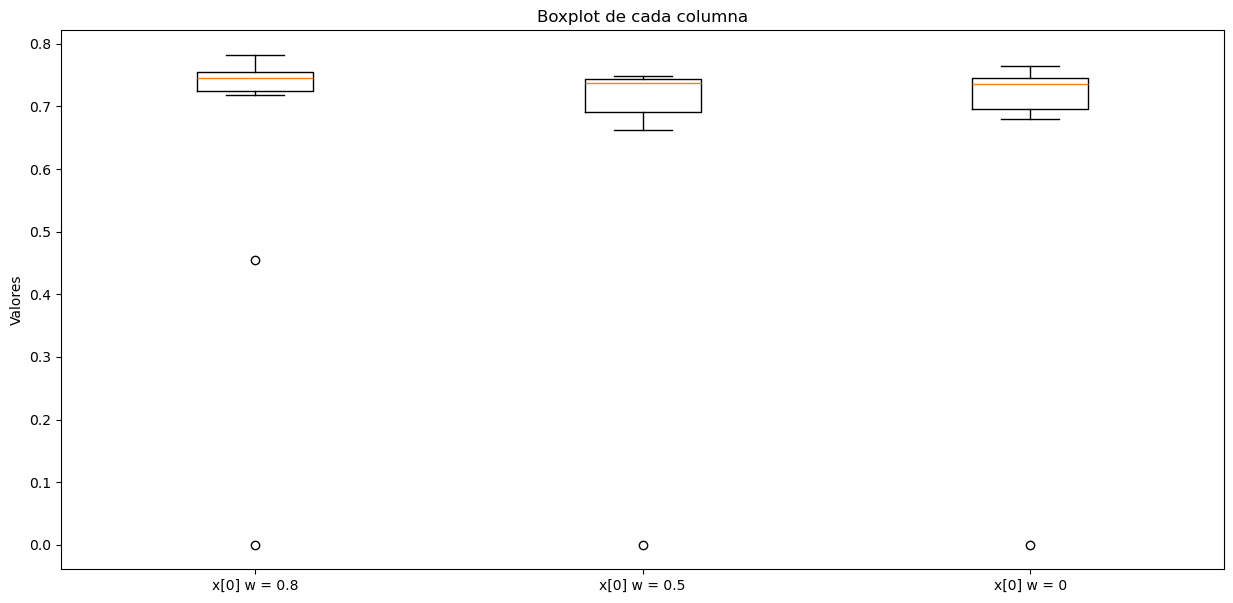

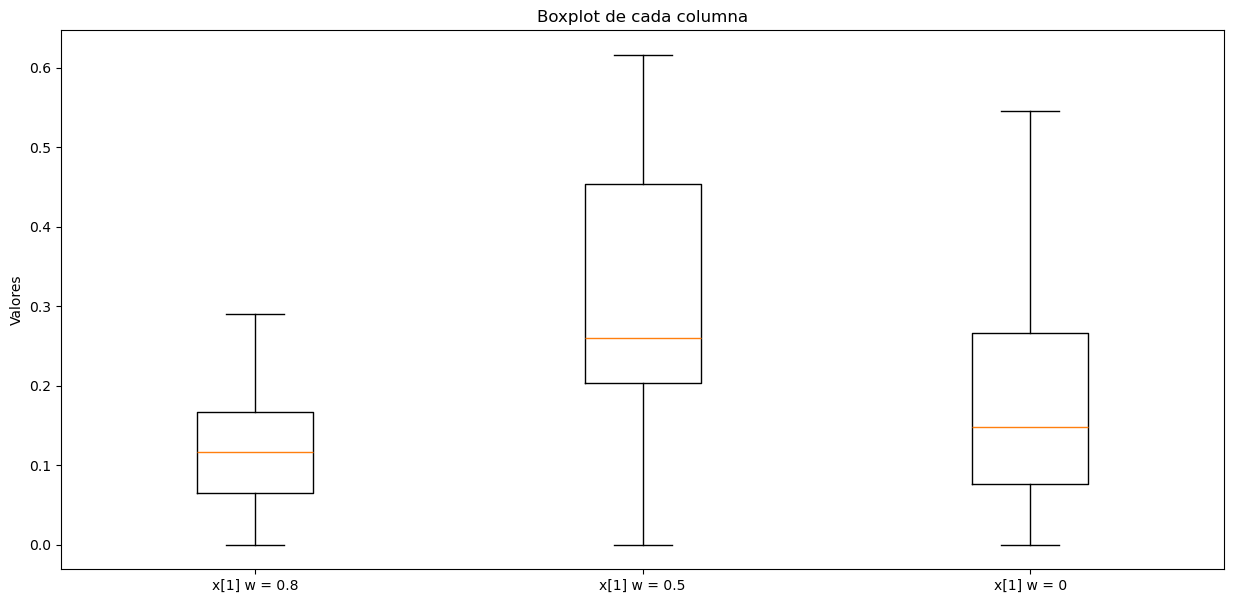

In [78]:

fig = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_history_mean3_1[:,0], gbest_history_mean3_2[:,0], gbest_history_mean3_3[:,0]], labels=["x[0] w = 0.8", "x[0] w = 0.5", "x[0] w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

plt.show()
fig2 = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_history_mean3_1[:,1], gbest_history_mean3_2[:,1], gbest_history_mean3_3[:,1]], labels=["x[1] w = 0.8", "x[1] w = 0.5", "x[1] w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

plt.show()

## Ejercicio 4

Resolver con PSO el siguiente sistema de ecuaciones:

 $$
\begin{cases}
3x + 2y = 9 \\
x - 5y = 4
\end{cases}
$$

Hay que construir una función de aptitud que mida qué tan cerca están las partículas de satisfacer ambas ecuaciones. 

Esta funcion aptitud sera la sima de los cuadrados de cada ecuacion:

$$
aptitud(x,y)=(3x + 2y - 9)^2 + (x - 5y - 4)^2
$$

Luego se minimiza esa funcion utilizando el algoritmo PSO

Primero se hara un grafico de ambas funciones para ver aproximadamente donde se cruzan para saber que restricciones ponerle al algoritmo

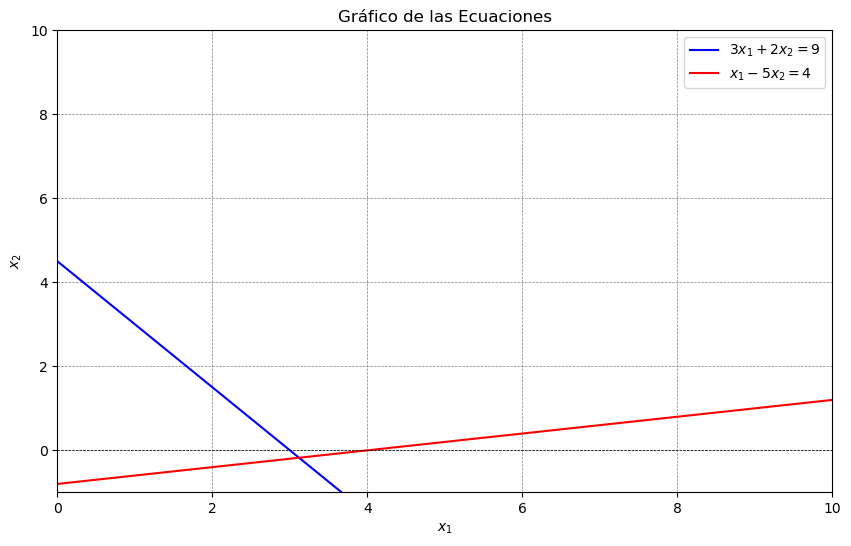

In [145]:
# Definir las ecuaciones
def f1(x1):
    return (9 - 3 * x1) / 2

def f2(x1):
    return (x1 - 4) / 5

# Crear un rango de valores para x1
x1_values = np.linspace(0, 10, 200)
x2_values_eq1 = f1(x1_values)
x2_values_eq2 = f2(x1_values)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x1_values, x2_values_eq1, label=r'$3x_1 + 2x_2 = 9$', color='blue')
plt.plot(x1_values, x2_values_eq2, label=r'$x_1 - 5x_2 = 4$', color='red')
plt.xlim(0, 10)
plt.ylim(-1, 10)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Gráfico de las Ecuaciones')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

Como se puede ver, las rectas se cortan entre 2 y 4 en x1 y entre 0 y -2 en x2 por lo tanto ahi se pondran las restricciones

In [100]:
def funcion_objetivo(x):
    # sistema de ecuaciones
    f1 = 3*x[0]+2*x[1]-9
    f2 = x[0] - 5*x[1] -4
    
    # devuelvo la funcion aptitud que es la suma de los errores cuadrados de cada ecuacion
    return f1**2 + f2**2


In [149]:
from pyswarm import pso

lb = [2, -2]  # limite inf
ub = [4, 0]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 15  # numero máximo de iteraciones para la optimizacion
historial_gbest = []

# Llamada a la función pso
solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=0.5)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
Best after iteration 1: [ 3.10815563 -0.19450259] 0.010672613172930914
Best after iteration 2: [ 3.10815563 -0.19450259] 0.010672613172930914
New best for swarm at iteration 3: [ 3.09809275 -0.16688007] 0.006116004620329048
Best after iteration 3: [ 3.09809275 -0.16688007] 0.006116004620329048
New best for swarm at iteration 4: [ 3.09941734 -0.1740096 ] 0.0034091359292287493
Best after iteration 4: [ 3.09941734 -0.1740096 ] 0.0034091359292287493
New best for swarm at iteration 5: [ 3.10007964 -0.17757437] 0.0031602534205741905
Best after iteration 5: [ 3.10007964 -0.17757437] 0.0031602534205741905
Best after iteration 6: [ 3.10007964 -0.17757437] 0.0031602534205741905
Best after iteration 7: [ 3.10007964 -0.17757437] 0.0031602534205741905
New best for swarm at iteration 8: [ 3.11113585 -0.17523205] 0.00045231486279141426
Best after iteration 8: [ 3.11113585 -0.17523205] 0.00045231486279141426
Best after iteration 9: [ 3.11113585 -0.17523205] 0.00045231486279141426